# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | kailua-kona
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | launceston
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | kamiiso
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | kroya
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | purpe
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | constantia
Processing Record 23 o

City not found. Skipping...
Processing Record 43 of Set 4 | shorapur
Processing Record 44 of Set 4 | susuman
Processing Record 45 of Set 4 | acarau
Processing Record 46 of Set 4 | shar
Processing Record 47 of Set 4 | thompson
Processing Record 48 of Set 4 | mejit
Processing Record 49 of Set 4 | kill devil hills
Processing Record 0 of Set 5 | noumea
Processing Record 1 of Set 5 | san fernando de apure
Processing Record 2 of Set 5 | cayambe
Processing Record 3 of Set 5 | argostolion
Processing Record 4 of Set 5 | bloemhof
Processing Record 5 of Set 5 | al 'alamayn
City not found. Skipping...
Processing Record 6 of Set 5 | glace bay
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | chongjin
Processing Record 9 of Set 5 | deyang
Processing Record 10 of Set 5 | kouango
Processing Record 11 of Set 5 | la'ie
Processing Record 12 of Set 5 | dedovichi
Processing Record 13 of Set 5 | fort-shevchenko
Processing Record 14 of Set 5 | gemena
Processing Record 15 of Set 5 | wong

Processing Record 36 of Set 8 | yerofey pavlovich
Processing Record 37 of Set 8 | gaoual
Processing Record 38 of Set 8 | farmville
Processing Record 39 of Set 8 | tanabe
Processing Record 40 of Set 8 | lorengau
Processing Record 41 of Set 8 | kahama
Processing Record 42 of Set 8 | horizon west
City not found. Skipping...
Processing Record 43 of Set 8 | anadyr
Processing Record 44 of Set 8 | la ronge
Processing Record 45 of Set 8 | indramayu
Processing Record 46 of Set 8 | priozersk
Processing Record 47 of Set 8 | howrah
Processing Record 48 of Set 8 | sciacca
Processing Record 49 of Set 8 | vallenar
Processing Record 0 of Set 9 | crane
Processing Record 1 of Set 9 | nogales
Processing Record 2 of Set 9 | olinda
Processing Record 3 of Set 9 | namibe
Processing Record 4 of Set 9 | lagunas
Processing Record 5 of Set 9 | elko
Processing Record 6 of Set 9 | hassi messaoud
Processing Record 7 of Set 9 | bel ombre
Processing Record 8 of Set 9 | grand falls-windsor
Processing Record 9 of Set 9

Processing Record 27 of Set 12 | turbat
-----------------------------
Data Retrieval Complete      
-----------------------------


In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,289.47,46,0,3.47,ZA,1696302180
1,kailua-kona,19.6406,-155.9956,301.21,78,86,1.34,US,1696302091
2,adamstown,-25.0660,-130.1015,293.51,74,38,10.01,PN,1696302121
3,port-aux-francais,-49.3500,70.2167,275.56,81,69,15.02,TF,1696302118
4,longyearbyen,78.2186,15.6401,270.06,68,75,8.23,SJ,1696302132


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,289.47,46,0,3.47,ZA,1696302180
1,kailua-kona,19.6406,-155.9956,301.21,78,86,1.34,US,1696302091
2,adamstown,-25.0660,-130.1015,293.51,74,38,10.01,PN,1696302121
3,port-aux-francais,-49.3500,70.2167,275.56,81,69,15.02,TF,1696302118
4,longyearbyen,78.2186,15.6401,270.06,68,75,8.23,SJ,1696302132


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

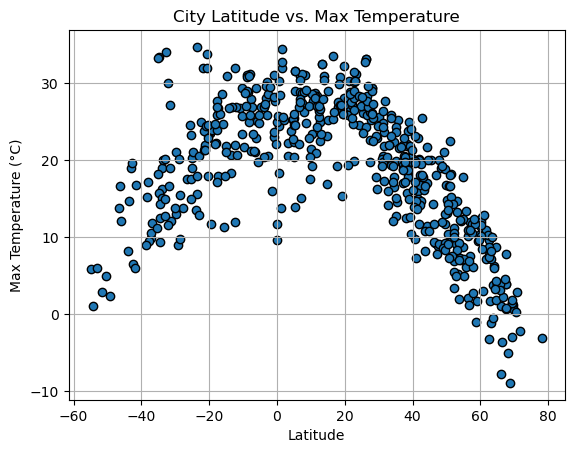

In [30]:
# Build scatter plot for latitude vs. temperature (in Celsius)
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"] - 273.15, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the grid
plt.grid()

# Show plot
plt.show()


#### Latitude Vs. Humidity

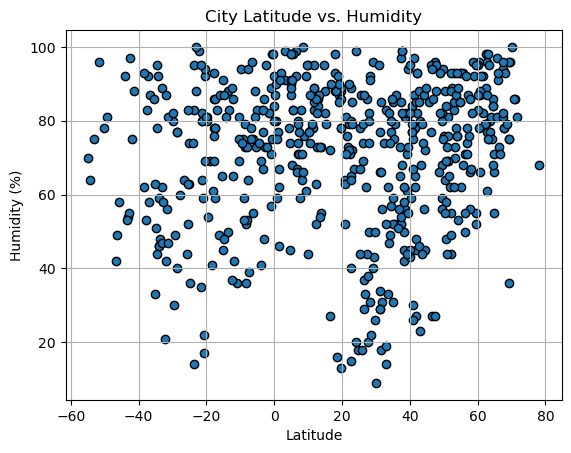

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the grid
plt.grid()

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

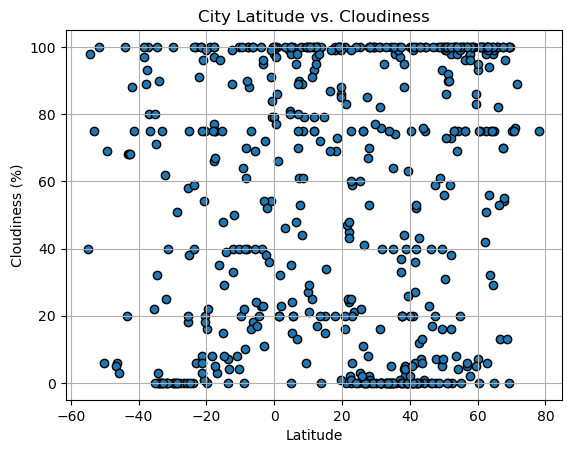

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the grid
plt.grid()

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

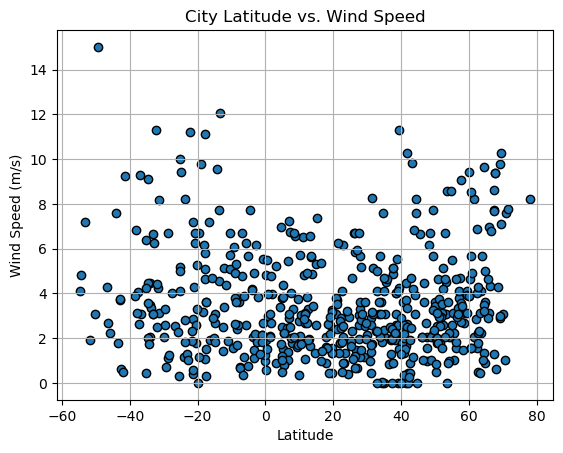

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the grid
plt.grid()

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [37]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Add regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Add r_value
    print(f"the r-value is: {r_value**2}")
    
    # Add labels and title
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)

    # Display the plot
    plt.show()


In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kailua-kona,19.6406,-155.9956,301.21,78,86,1.34,US,1696302091
4,longyearbyen,78.2186,15.6401,270.06,68,75,8.23,SJ,1696302132
6,saipan,15.1355,145.7010,302.11,79,34,7.39,MP,1696302147
7,bethel,41.3712,-73.4140,289.62,87,0,0.00,US,1696301834
8,kamiiso,41.8167,140.6500,293.36,45,40,10.29,JP,1696302180


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,289.47,46,0,3.47,ZA,1696302180
2,adamstown,-25.0660,-130.1015,293.51,74,38,10.01,PN,1696302121
3,port-aux-francais,-49.3500,70.2167,275.56,81,69,15.02,TF,1696302118
5,launceston,-41.4500,147.1667,290.01,88,75,9.26,AU,1696302156
10,blackmans bay,-43.0167,147.3167,292.22,54,68,3.71,AU,1696302130


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.693424469504527


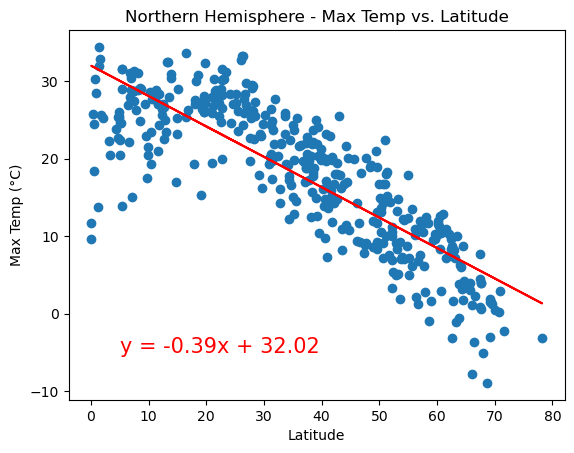

In [40]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]- 273.15, 
                       "Northern Hemisphere - Max Temp vs. Latitude", 
                       "Max Temp (°C)", (5, -5))

the r-value is: 0.46112910512651567


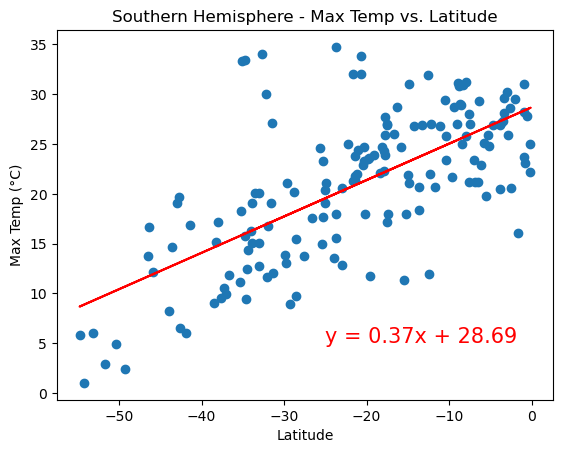

In [41]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]- 273.15, 
                       "Southern Hemisphere - Max Temp vs. Latitude", 
                       "Max Temp (°C)", (-25, 5))

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.0034950716794784563


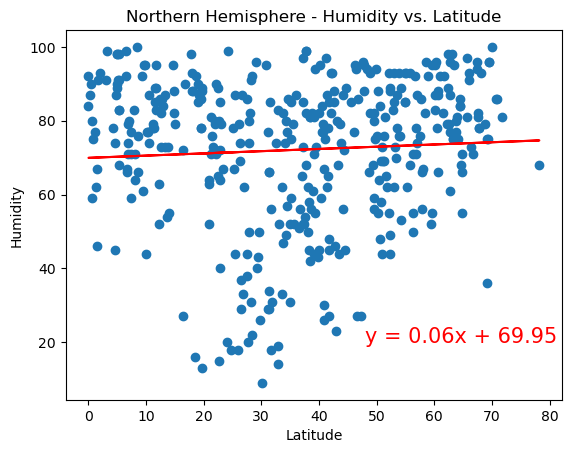

In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere - Humidity vs. Latitude", 
                       "Humidity", (48, 20))

the r-value is: 0.01316708465274638


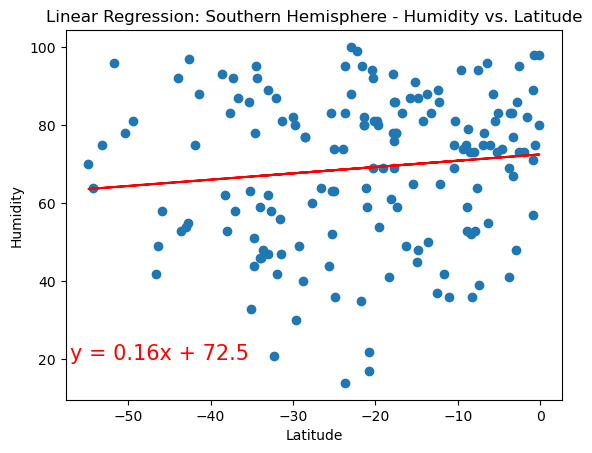

In [43]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression: Southern Hemisphere - Humidity vs. Latitude", 
                       "Humidity", (-57, 20))

**Discussion about the linear relationship:** Both the Southern and Northern hemispheres have r-values close to 0, indicating a very weak linear correlation or little to no correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.004040587772851683


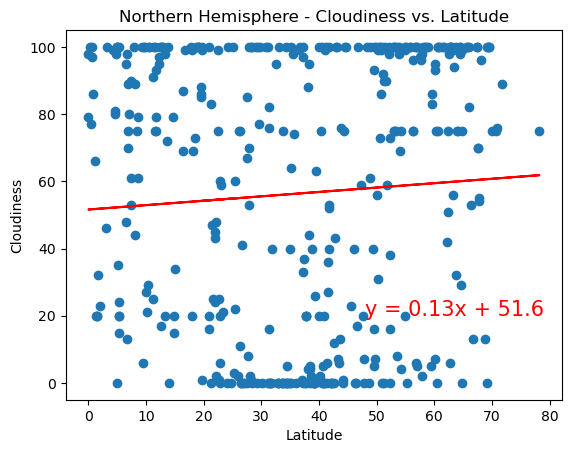

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere - Cloudiness vs. Latitude", 
                       "Cloudiness", (48, 20))

the r-value is: 0.008418912222696731


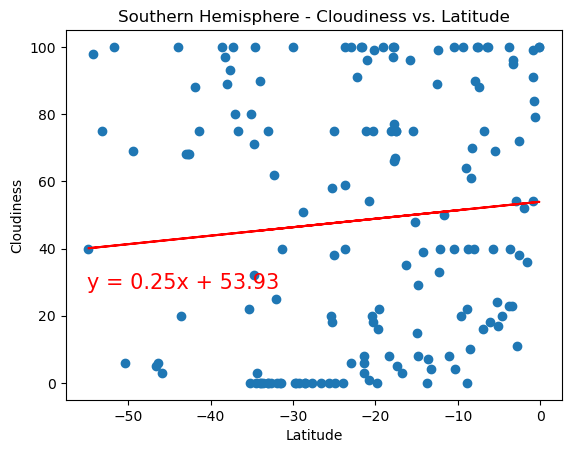

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude", 
                       "Cloudiness", (-55, 28))

**Discussion about the linear relationship:** Both the Southern and Northern hemispheres have r-values close to 0, indicating a very weak linear correlation or little to no correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.03514237451257661


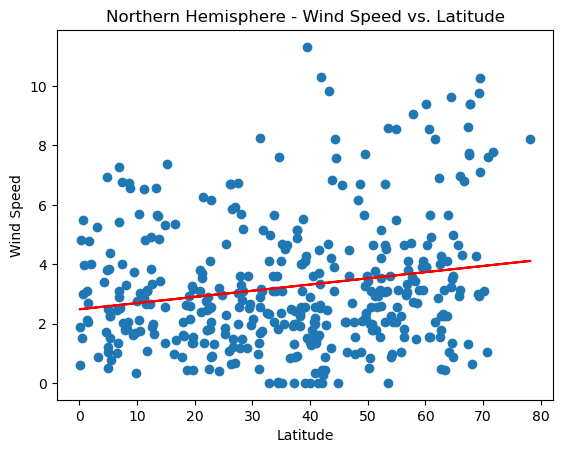

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere - Wind Speed vs. Latitude", 
                       "Wind Speed", (50, 13))

the r-value is: 0.02300026212694254


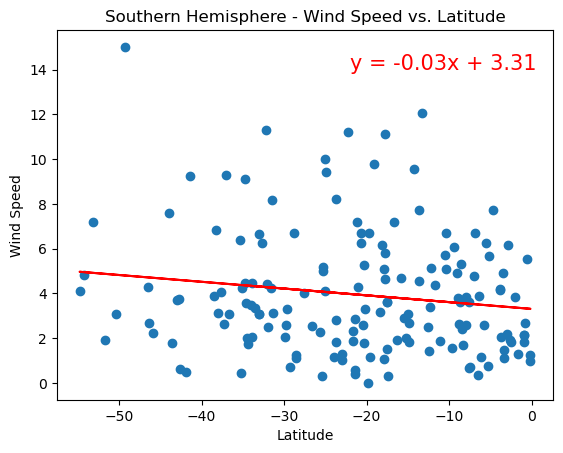

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude", 
                       "Wind Speed", (-22, 14))

**Discussion about the linear relationship:** Both the Southern and Northern hemispheres have r-values close to 0, indicating a very weak linear correlation or little to no correlation between wind speed and latitude.